In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dow_jones_raw = pd.read_csv("../data/dow_jones_index.data")

In [4]:
dow_jones_raw.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [5]:
dow_jones_raw.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

## Clean the data.
* Convert dollars to float64 (sometimes it is more cost efficient to convert to int by multiplying by 100)
* Convert date to datetime and reindex

In [6]:
dow_jones_raw.loc[:, ('open')] = dow_jones_raw['open'].astype('str').str.strip('$')

In [7]:
dollars=[]
for column in dow_jones_raw.columns:
    if column =='stock' or column =='date':
        continue
    elif dow_jones_raw[column].dtype == 'object':
        dollars.append(column)
    else:
        continue

In [8]:
for name in dollars:
    dow_jones_raw.loc[:, (name)] = dow_jones_raw[name].astype('str').str.strip('$').astype('float64')

In [9]:
dow_jones_raw.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [10]:
dow_jones_raw['stock'].unique()

array(['AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE',
       'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KRFT', 'KO', 'MCD',
       'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'T', 'TRV', 'UTX', 'VZ', 'WMT',
       'XOM'], dtype=object)

In [11]:
dow_jones_raw['date'] = pd.to_datetime(dow_jones_raw['date'])

In [12]:
dow_jones_raw.set_index(['date'], inplace = True)

In [14]:
a_few_companies = dow_jones_raw[(dow_jones_raw['stock'] == 'AA') | 
                                (dow_jones_raw['stock'] == 'BA' )|
                                (dow_jones_raw['stock'] == 'GE') |
                                (dow_jones_raw['stock'] == 'JNJ')|
                                (dow_jones_raw['stock'] == 'PG')
                               ]
a_few_companies.sort_index(inplace=True)

/home/rob/anaconda3/envs/mlalgos/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


/home/rob/anaconda3/envs/mlalgos/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(734144.0, 734312.0)

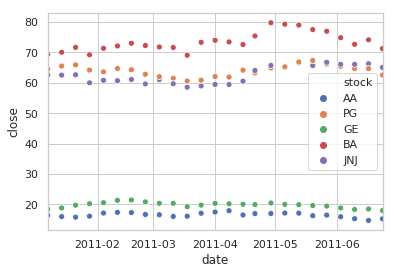

In [15]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x=a_few_companies.index, 
                     y="close",
                     hue = 'stock',
                     data=a_few_companies
                    )
plt.xlim('2011-01-07', '2011-06-24')

In [1]:
## TODO break apart different features and compare

(734144.0, 734312.0)

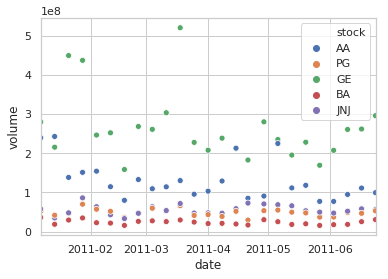

In [16]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x=a_few_companies.index, 
                     y="volume",
                     hue = 'stock',
                     data=a_few_companies
                    )
plt.xlim('2011-01-07', '2011-06-24')

(734144.0, 734312.0)

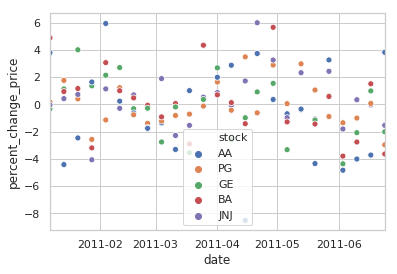

In [17]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x=a_few_companies.index, 
                     y="percent_change_price",
                     hue = 'stock',
                     data=a_few_companies
                    )
plt.xlim('2011-01-07', '2011-06-24')